In [1]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
import tensorflow as tf
from keras.models import Model
import matplotlib.pyplot as plt

In [2]:
img_path = 'dog.jpg'
img = image.load_img(img_path,target_size=(64,64))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
x = preprocess_input(x)

In [3]:
x.shape

(1, 64, 64, 3)

In [4]:
y = x.copy()

In [5]:
y.shape

(1, 64, 64, 3)

In [6]:
# Part 2 - Building the CNN

# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - # Adding a first convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=8,kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=3, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=8,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())
#l Connection
# cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
# Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [7]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 8)         224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 8)         584       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 8)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1800)              0         
                                                                 
 dense (Dense)               (None, 1)                 1

In [8]:
layer_names = [layer.name for layer in cnn.layers]
layer_names

['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'flatten', 'dense']

In [9]:
cnn.layers

In [10]:
layer_outputs = [layer.output for layer in cnn.layers]
layer_outputs

[<KerasTensor: shape=(None, 62, 62, 8) dtype=float32 (created by layer 'conv2d')>,
 <KerasTensor: shape=(None, 30, 30, 8) dtype=float32 (created by layer 'max_pooling2d')>,
 <KerasTensor: shape=(None, 30, 30, 8) dtype=float32 (created by layer 'conv2d_1')>,
 <KerasTensor: shape=(None, 15, 15, 8) dtype=float32 (created by layer 'max_pooling2d_1')>,
 <KerasTensor: shape=(None, 1800) dtype=float32 (created by layer 'flatten')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense')>]

In [11]:
feature_map_model = tf.keras.models.Model(inputs=cnn.input, outputs=layer_outputs)

In [12]:
feature_maps = feature_map_model.predict(x)

In [13]:
for layer_name, feature_map in zip(layer_names, feature_maps):
    print(f"The shape of the {layer_name} is =======>> {feature_map.shape}")

The shape of the conv2d is =======>> (1, 62, 62, 8)
The shape of the max_pooling2d is =======>> (1, 30, 30, 8)
The shape of the conv2d_1 is =======>> (1, 30, 30, 8)
The shape of the max_pooling2d_1 is =======>> (1, 15, 15, 8)
The shape of the flatten is =======>> (1, 1800)
The shape of the dense is =======>> (1, 1)


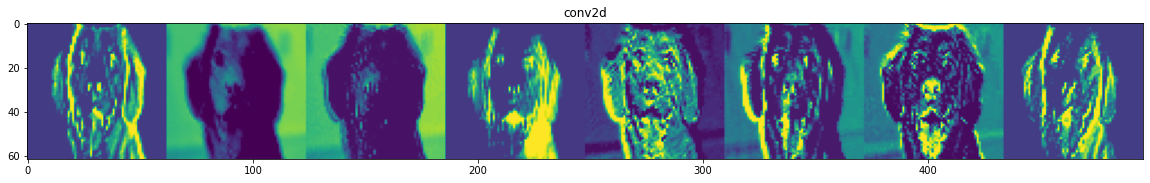

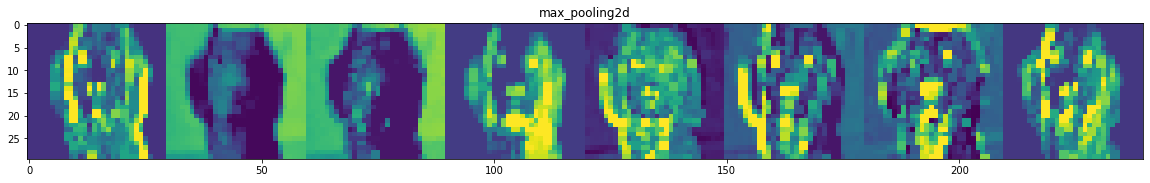

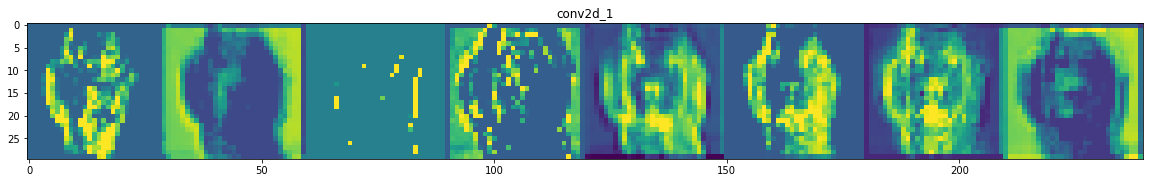

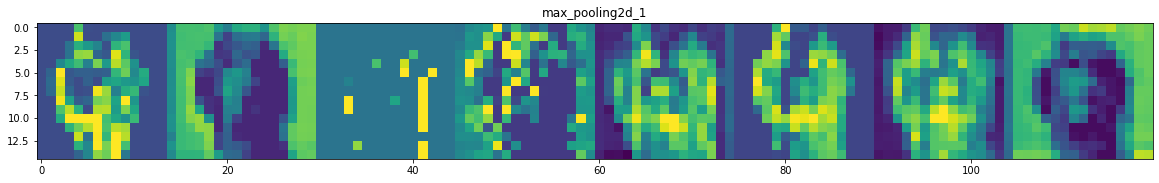

In [14]:
for layer_name, feature_map in zip(layer_names, feature_maps):
    
      if len(feature_map.shape) == 4:
        n_features = feature_map.shape[-1]  # number of features in the feature map
        size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)

        # We will tile our images in this matrix
        display_grid = np.zeros((size, size * n_features))

        #-------------------------------------------------
        # Postprocess the feature to be visually palatable
        #-------------------------------------------------
        for i in range(n_features):
          x  = feature_map[0, :, :, i]
          x -= x.mean()
          x /= x.std ()
          x *=  64
          x += 128
          x  = np.clip(x, 0, 255).astype('uint8')
          display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

        #-----------------
        # Display the grid
        #-----------------

        scale = 20. / n_features
        plt.figure( figsize=(scale * n_features, scale) )
        plt.title ( layer_name )
        plt.grid  ( False )
        plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

## Overall Visualiztion

In [15]:
cnn.layers[3].output

<KerasTensor: shape=(None, 15, 15, 8) dtype=float32 (created by layer 'max_pooling2d_1')>

In [16]:
cnn = Model(inputs=cnn.input,outputs=cnn.layers[3].output)
features = cnn.predict(y)
features.shape

(1, 15, 15, 8)

In [17]:
features

array([[[[  0.       ,  73.45613  ,   0.       , ...,   0.       ,
            5.311014 ,  74.75725  ],
         [  0.       ,  73.801384 ,   0.       , ...,   0.       ,
            7.923052 ,  75.1798   ],
         [  0.       ,  73.52939  ,   0.       , ...,   0.       ,
            8.49667  ,  74.69577  ],
         ...,
         [  0.       ,  84.65492  ,   0.       , ...,   0.       ,
            8.503098 ,  86.14075  ],
         [  0.       ,  86.12821  ,   0.       , ...,   0.       ,
            7.808794 ,  89.32081  ],
         [ 14.686786 ,  86.1103   ,   0.       , ...,   0.       ,
           34.090874 ,  85.77933  ]],

        [[  0.       ,  72.48268  ,   0.       , ...,   0.       ,
            3.7300663,  73.74778  ],
         [  0.       ,  73.67175  ,   0.       , ...,   0.       ,
            7.922806 ,  75.10809  ],
         [  0.       ,  74.14548  ,   0.       , ...,   0.       ,
           11.7072735,  75.09694  ],
         ...,
         [  0.       ,  81.99845  

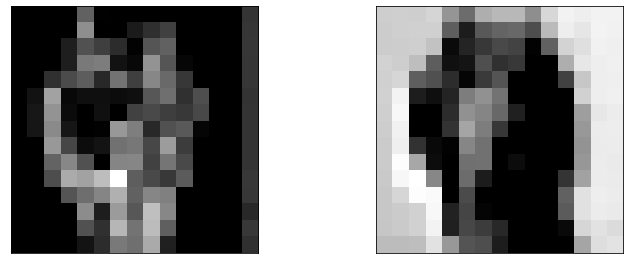

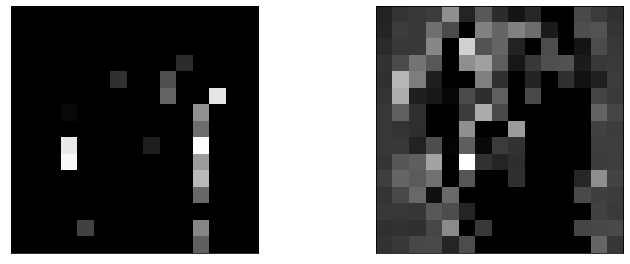

In [19]:
square = 2
ix = 1

for _ in range(square):
    plt.figure(figsize=(12,10))
    for _ in range(square):
        ax = plt.subplot(square,square,ix)
        ax.set_xticks([])
        ax.set_yticks([])
        
        plt.imshow(features[0,:,:,ix-1],cmap='gray')
        ix+=1
plt.show()

In [20]:
features.shape

(1, 15, 15, 8)

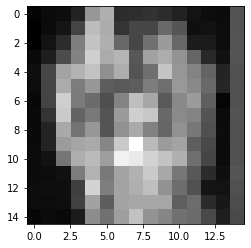

In [22]:
plt.imshow(features[0,:,:,6],cmap='gray')

In [57]:
model=tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(8,(3,3),activation ='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(16,(3,3),activation ='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(32,(3,3),activation ='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dense(512,activation='relu'),
    
    tf.keras.layers.Dense(3,activation='softmax')    
 ])